In [1]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\King\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import pandas as pd

df_review = pd.read_csv("dataset_NBc_fedy.csv")
df_review.tail()

,Label,Tweet
200,Negatif,yg bs goreng isiu ngamuk karna laku ppkm darur...
201,Negatif,yg habib mustofa al haddar kalimantan pes waki...
202,Negatif,yg razia yaqut org nu kenal toa masjid seabreg...
203,Negatif,yg wujud gagal perintah lindung rakyat gagal t...
204,Negatif,yth presiden ri tolong stop terbang manusia ne...


In [11]:
df_review["Label"].value_counts()

Negatif    119
Positif     86
Name: Label, dtype: int64

In [15]:
df_review = pd.read_csv("dataset_NBc_fedy1.csv")
df_review

,Label,Tweet
0,1,alhamdulilah orang jalan pt ibrahim daftar vak...
1,0,amah gue positif c sedih bgt pas dapet kabar k...
2,0,ancam sakit mati krn covid bgt yuk perbnyk bic...
3,0,anggap remeh wabah covid berat banjir igd kapa...
4,0,anggota komisi xi dpr fraksi partai demokrat d...
...,...,...
200,0,yg bs goreng isiu ngamuk karna laku ppkm darur...
201,0,yg habib mustofa al haddar kalimantan pes waki...
202,0,yg razia yaqut org nu kenal toa masjid seabreg...
203,0,yg wujud gagal perintah lindung rakyat gagal t...


In [16]:
df_review["Label"].value_counts()

0    119
1     86
Name: Label, dtype: int64

In [17]:
df_preprocessed = df_review.copy()
#df_preprocessed = df_preprocessed.drop(columns=['Date', 'Name'])
df_preprocessed.head()

,Label,Tweet
0,1,alhamdulilah orang jalan pt ibrahim daftar vak...
1,0,amah gue positif c sedih bgt pas dapet kabar k...
2,0,ancam sakit mati krn covid bgt yuk perbnyk bic...
3,0,anggap remeh wabah covid berat banjir igd kapa...
4,0,anggota komisi xi dpr fraksi partai demokrat d...


In [18]:
print(df_preprocessed.shape)
print(df_preprocessed['Label'].value_counts(normalize=True))

(205, 2)
0    0.580488
1    0.419512
Name: Label, dtype: float64


In [30]:
df_review["Label"].value_counts()

0    119
1     86
Name: Label, dtype: int64

# Diagram Lingkaran untuk Persentase Tweet Positif dan Negatif

In [35]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

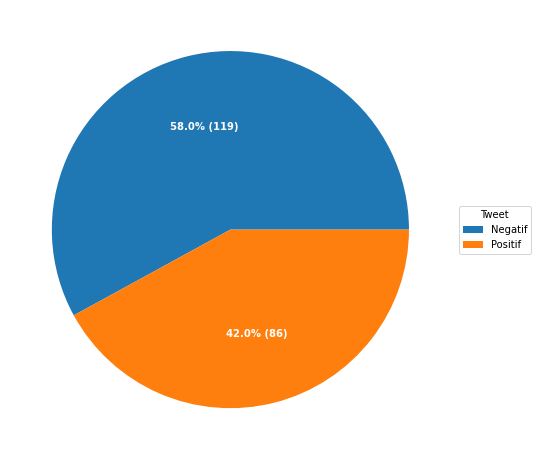

In [37]:
label = ['Negatif', 'Positif']
count_data = np.array(df_review["Label"].value_counts())+1

show_pie(label, count_data, "Tweet")

# Wordcloud Tweet Positif dan Negatif

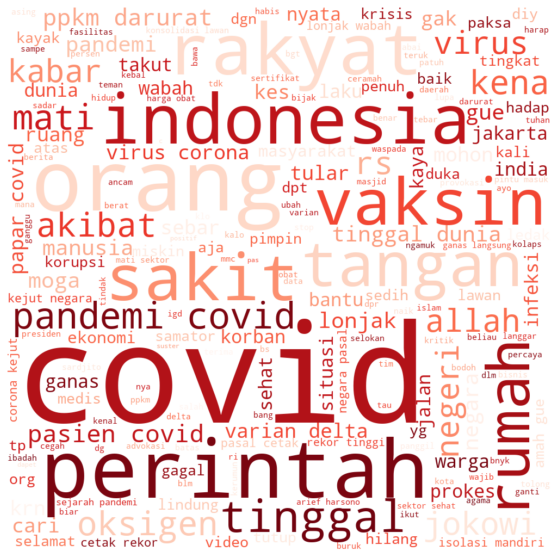

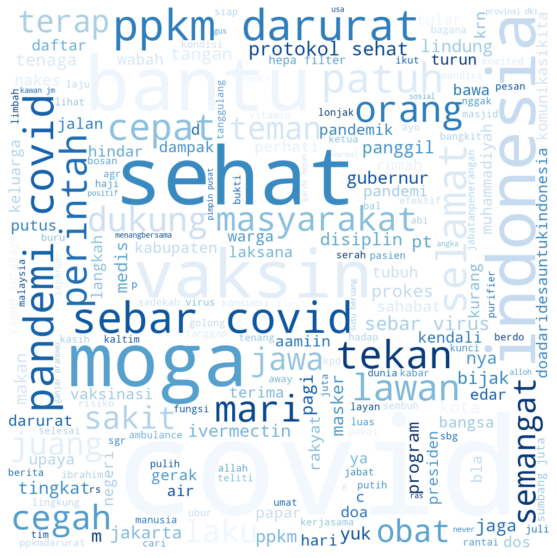

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["Label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["Tweet"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["Label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["Tweet"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



# Wordcloud semua Tweet

In [38]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

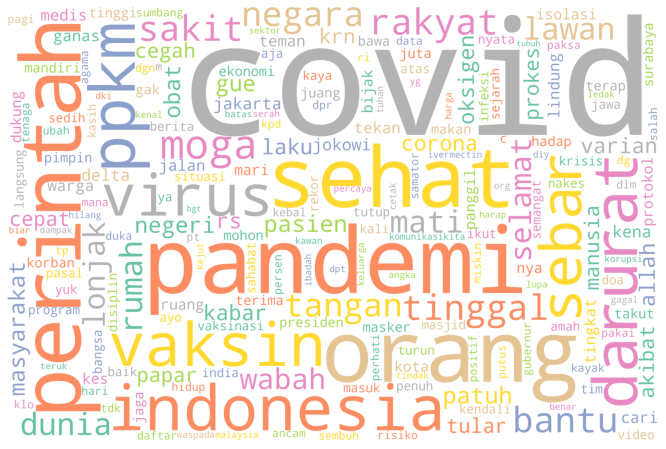

In [42]:
all_words = ' '.join([tweets for tweets in df_review['Tweet']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

# Fav Tweet

In [4]:
import pandas as pd
import numpy as np
import nltk
import string
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\King\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def load_data():
    data = pd.read_csv('Crawling_Covid_beta.csv')
    return data

In [6]:
tweet_df = load_data()

In [7]:
tweet_df.head(n=10)

,tweetcreatedts,username,text,retweet_count,like
0,2021-07-03 23:59:58,lendrifa,"Menghadapi lonjakan kasus COVID-19 di RI, mask...",6,0
1,2021-07-03 23:59:57,ccsptr__,Baru kali ini terjadi kematian di luar fasilit...,1463,0
2,2021-07-03 23:59:53,wonykkura,Kabar Baik!!\n\nPenelitian terbaru menyatakan ...,5126,0
3,2021-07-03 23:59:51,hadi_11bsk,Indonesia tengah menunggu 'hibahan' vaksin COV...,13,0
4,2021-07-03 23:59:50,TofikNew,"HMI: ""Keterpurukan negara ini ini tak hanya te...",234,0
5,2021-07-03 23:59:46,TeyengCekap,Luhut: Jangan Coba-coba Naikkan Harga Obat COV...,195,0
6,2021-07-03 23:59:41,faaraa_mokhtar,𝗖𝗔𝗥𝗔 𝗡𝗔𝗞 𝗖𝗘𝗣𝗔𝗧𝗞𝗔𝗡 𝗗𝗔𝗣𝗔𝗧 𝗧𝗔𝗥𝗜𝗞𝗛 𝗩𝗔𝗞𝗦𝗜𝗡\n\nYang ...,15706,0
7,2021-07-03 23:59:40,incitu,Turut berduka cita.\n\nPabrik oksigennya pun t...,5,5
8,2021-07-03 23:59:39,windryramadhina,Baru kali ini terjadi kematian di luar fasilit...,1463,0
9,2021-07-03 23:59:37,Salimbado9,"Berwudhu tidak menghancurkan virus Corona, kar...",22,0


In [8]:
fav = tweet_df[['tweetcreatedts','username','text', 'like']].sort_values('like', ascending=False).nlargest(10, 'like')

In [9]:
fav

,tweetcreatedts,username,text,like
728,2021-07-03 23:35:04,tempodotco,"Oksigen di RSUP Sardjito Yogya Menipis, 35 Pas...",166
465,2021-07-03 23:43:21,syahrial_nst,"Hari ini, 2 orang sahabat dikabarkan meninggal...",159
703,2021-07-03 23:36:01,akang_hero,Hari ke 11 Saya sekeluarga terpapar covid 19. ...,120
587,2021-07-03 23:39:42,kompascom,Rumah Sakit Umum Pemerintah (RSUP) Dr Sardjito...,66
651,2021-07-03 23:37:49,fadjroeL,"Kita 1 ras, ras manusia! Dengan 1 musuh bersam...",60
472,2021-07-03 23:43:04,JatimPemprov,"Sobat Jatim, berikut ini peta sebaran COVID-1...",57
792,2021-07-03 23:33:05,Harian_Jogja,"Pasien Membeludak, Sleman Buka Rumah Sakit Dar...",43
446,2021-07-03 23:43:52,SinarOnline,Ketika rakyat bertungkus lumus mencari nafkah ...,42
301,2021-07-03 23:49:04,KompasTV,Jangan Panik! Ini 5 Latihan Pernapasan Pasien ...,35
180,2021-07-03 23:53:55,ARIFILIZER,Ada beberapa yang DM soal permenkes pemanfaata...,28


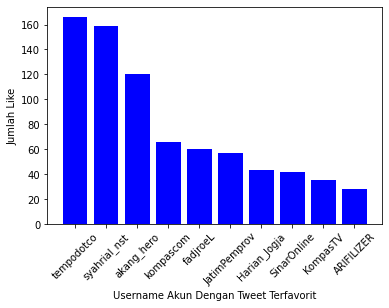

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(fav['username'])
y = np.array(fav['like'])

plt.bar(x, y, color = "blue")
plt.xticks(rotation=45)
plt.xlabel("Username Akun Dengan Tweet Terfavorit")
plt.ylabel("Jumlah Like")
plt.show(10)